In [ ]:
# Euclidean Distance Formula is used to calculate distance between two datapoints in a plane.
'''
Eg. x1 = 2, x2 = 3.5, y1 = 3.5, y2 = 6
These two points : x1y1 = (2,3.5) , x2y2 = (3.5,6)
(x2-x1)² + (y2-y1)²
'''

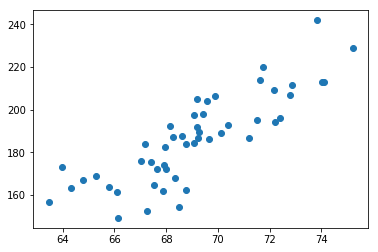

,Height,Weight,Class
0,73.847017,241.893563,XL
1,68.781904,162.310473,S
2,74.110105,212.740856,L
3,71.730978,220.042470,L
4,69.881796,206.349801,M
5,67.253016,152.212156,S
6,68.785081,183.927889,L
7,68.348516,167.971111,S
8,67.018950,175.929440,L
9,63.456494,156.399676,S


In [16]:
import pandas as pd
from matplotlib import pyplot
import numpy as np

df = pd.read_csv('ht-wt with classification.csv')
X = df['Height']
Y = df['Weight']
df
pyplot.scatter(X,Y)
pyplot.show()
df

In [6]:
'''
Technical Theory :
Based on 'k' we will find out the neighbours to consider
1. First provide the testInstance
'''

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-6-7a537f280d7e>, line 4)

In [19]:
def euclideanDistance(data1, data2, length):
    distance = 0
    for i in range(length):
        distance += np.square(data1[i] - data2[i])
    print("Distance of ",data1,"with",data2,"is",np.sqrt(distance))
    return np.sqrt(distance)

def knn(trainingSet, testInstance, k):
    distances = {}
    length = testInstance.shape[1] # Here it takes the dimensions of the input : based on columns
    print("Dimensions are ", length)
    for i in range(len(trainingSet)): # Here we are calculating distance of what we provided with the existing trainingSet
        dist = euclideanDistance(testInstance, trainingSet.iloc[i], length) # Iterate through each row of the training set
        distances[i] = dist[0]
    print("Distance of items are :",distances.items()) # here it prints tuples of Distance and it's value
    sorted_d = sorted(distances.items(), key=lambda elem: elem[1])
    print("sorted dists: ",sorted_d)
    neighbours = []
    for i in range(k):
        neighbours.append(sorted_d[i][0])
    classvotes = {}
    for i in range(len(neighbours)):
        response = trainingSet.iloc[neighbours[i]][-1]
        if response in classvotes:
            classvotes[response] +=1
        else:
            classvotes[response] = 1
        sortedvotes = sorted(classvotes.items(), key = lambda elem: elem[1], reverse = True) 
    return sortedvotes[0][0], neighbours


htwt = [[74,204.455]]
k = 3
dfhtwt = pd.DataFrame(htwt)
result, neigh = knn(df,dfhtwt,k)

print(result,neigh)

Dimensions are  2
Distance of      0        1
0  74  204.455 with Height     73.847
Weight    241.894
Class          XL
Name: 0, dtype: object is 0    37.438876
Name: 0, dtype: float64
Distance of      0        1
0  74  204.455 with Height    68.7819
Weight     162.31
Class           S
Name: 1, dtype: object is 0    42.466336
Name: 0, dtype: float64
Distance of      0        1
0  74  204.455 with Height    74.1101
Weight    212.741
Class           L
Name: 2, dtype: object is 0    8.286587
Name: 0, dtype: float64
Distance of      0        1
0  74  204.455 with Height     71.731
Weight    220.042
Class           L
Name: 3, dtype: object is 0    15.751752
Name: 0, dtype: float64
Distance of      0        1
0  74  204.455 with Height    69.8818
Weight     206.35
Class           M
Name: 4, dtype: object is 0    4.533197
Name: 0, dtype: float64
Distance of      0        1
0  74  204.455 with Height     67.253
Weight    152.212
Class           S
Name: 5, dtype: object is 0    52.676718
Name: 